In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder


In [2]:
# Load the data
train_identity = pd.read_csv("Data/train_identity.csv")
train_transaction = pd.read_csv("Data/train_transaction.csv")
test_identity = pd.read_csv("Data/test_identity.csv")
test_transaction = pd.read_csv("Data/test_transaction.csv")

In [3]:
# Merge the datasets
train_data = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test_data = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')

In [4]:
train_data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [5]:
test_data.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
def count_feature_type(df):
    return df.dtypes.value_counts()

print("Train data\n", count_feature_type(train_data) ,"\n")
print("Test data\n",count_feature_type(test_data))

Train data
 float64    399
object      31
int64        4
dtype: int64 

Test data
 float64    399
object      31
int64        3
dtype: int64


In [7]:
print(f'Train dataset has {train_data.shape[0]} rows and {train_data.shape[1]} columns.')
print(f'Test dataset has {test_data.shape[0]} rows and {test_data.shape[1]} columns.')

Train dataset has 590540 rows and 434 columns.
Test dataset has 506691 rows and 433 columns.


In [8]:
train_data.drop(['P_emaildomain','R_emaildomain','id_01','id_02','id_03','id_04','id_05','id_06'
           ,'id_07','id_08','id_09','id_10','id_11','id_12','id_13','id_14','id_15','id_16'
           ,'id_17','id_18','id_19','id_20','id_21','id_22','id_23','id_24','id_25','id_26'
           ,'id_27','id_28','id_29','id_30','id_31','id_32','id_33','id_34','id_35','id_36','id_37',
           'id_38'],axis=1,inplace=True)

In [9]:
test_data.drop(['P_emaildomain','R_emaildomain','id-01','id-02','id-03','id-04','id-05','id-06'
           ,'id-07','id-08','id-09','id-10','id-11','id-12','id-13','id-14','id-15','id-16'
           ,'id-17','id-18','id-19','id-20','id-21','id-22','id-23','id-24','id-25','id-26'
           ,'id-27','id-28','id-29','id-30','id-31','id-32','id-33','id-34','id-35','id-36','id-37',
           'id-38','DeviceInfo'],axis=1,inplace=True)

#### Missing Values
Look for the amount of null values present in all the features and its data type.

In [10]:
for i in test_data.columns:
    print(i,'NaN values present is:',test_data[i].isnull().sum(),end=" ")
    print('Data type :',test_data[i].dtypes,end=" ")
    print('% of Missing data:',np.round(test_data[i].isnull().sum()/test_data.shape[0]*100,2))

TransactionID NaN values present is: 0 Data type : int64 % of Missing data: 0.0
TransactionDT NaN values present is: 0 Data type : int64 % of Missing data: 0.0
TransactionAmt NaN values present is: 0 Data type : float64 % of Missing data: 0.0
ProductCD NaN values present is: 0 Data type : object % of Missing data: 0.0
card1 NaN values present is: 0 Data type : int64 % of Missing data: 0.0
card2 NaN values present is: 8654 Data type : float64 % of Missing data: 1.71
card3 NaN values present is: 3002 Data type : float64 % of Missing data: 0.59
card4 NaN values present is: 3086 Data type : object % of Missing data: 0.61
card5 NaN values present is: 4547 Data type : float64 % of Missing data: 0.9
card6 NaN values present is: 3007 Data type : object % of Missing data: 0.59
addr1 NaN values present is: 65609 Data type : float64 % of Missing data: 12.95
addr2 NaN values present is: 65609 Data type : float64 % of Missing data: 12.95
dist1 NaN values present is: 291217 Data type : float64 % of 

V105 NaN values present is: 0 Data type : float64 % of Missing data: 0.0
V106 NaN values present is: 0 Data type : float64 % of Missing data: 0.0
V107 NaN values present is: 0 Data type : float64 % of Missing data: 0.0
V108 NaN values present is: 0 Data type : float64 % of Missing data: 0.0
V109 NaN values present is: 0 Data type : float64 % of Missing data: 0.0
V110 NaN values present is: 0 Data type : float64 % of Missing data: 0.0
V111 NaN values present is: 0 Data type : float64 % of Missing data: 0.0
V112 NaN values present is: 0 Data type : float64 % of Missing data: 0.0
V113 NaN values present is: 0 Data type : float64 % of Missing data: 0.0
V114 NaN values present is: 0 Data type : float64 % of Missing data: 0.0
V115 NaN values present is: 0 Data type : float64 % of Missing data: 0.0
V116 NaN values present is: 0 Data type : float64 % of Missing data: 0.0
V117 NaN values present is: 0 Data type : float64 % of Missing data: 0.0
V118 NaN values present is: 0 Data type : float64 %

V216 NaN values present is: 369957 Data type : float64 % of Missing data: 73.01
V217 NaN values present is: 379963 Data type : float64 % of Missing data: 74.99
V218 NaN values present is: 379963 Data type : float64 % of Missing data: 74.99
V219 NaN values present is: 379963 Data type : float64 % of Missing data: 74.99
V220 NaN values present is: 369375 Data type : float64 % of Missing data: 72.9
V221 NaN values present is: 369375 Data type : float64 % of Missing data: 72.9
V222 NaN values present is: 369375 Data type : float64 % of Missing data: 72.9
V223 NaN values present is: 379963 Data type : float64 % of Missing data: 74.99
V224 NaN values present is: 379963 Data type : float64 % of Missing data: 74.99
V225 NaN values present is: 379963 Data type : float64 % of Missing data: 74.99
V226 NaN values present is: 379963 Data type : float64 % of Missing data: 74.99
V227 NaN values present is: 369375 Data type : float64 % of Missing data: 72.9
V228 NaN values present is: 379963 Data type

V330 NaN values present is: 430260 Data type : float64 % of Missing data: 84.92
V331 NaN values present is: 430260 Data type : float64 % of Missing data: 84.92
V332 NaN values present is: 430260 Data type : float64 % of Missing data: 84.92
V333 NaN values present is: 430260 Data type : float64 % of Missing data: 84.92
V334 NaN values present is: 430260 Data type : float64 % of Missing data: 84.92
V335 NaN values present is: 430260 Data type : float64 % of Missing data: 84.92
V336 NaN values present is: 430260 Data type : float64 % of Missing data: 84.92
V337 NaN values present is: 430260 Data type : float64 % of Missing data: 84.92
V338 NaN values present is: 430260 Data type : float64 % of Missing data: 84.92
V339 NaN values present is: 430260 Data type : float64 % of Missing data: 84.92
DeviceType NaN values present is: 369760 Data type : object % of Missing data: 72.98


In [11]:
for i in train_data.columns:
    print(i,'NaN values present is:',train_data[i].isnull().sum(),end=" ")
    print('Data type :',train_data[i].dtypes,end=" ")
    print(" % of Missing data = ", "%.2f%%" % (train_data[i].isnull().sum()/train_data.shape[0]*100))

TransactionID NaN values present is: 0 Data type : int64  % of Missing data =  0.00%
isFraud NaN values present is: 0 Data type : int64  % of Missing data =  0.00%
TransactionDT NaN values present is: 0 Data type : int64  % of Missing data =  0.00%
TransactionAmt NaN values present is: 0 Data type : float64  % of Missing data =  0.00%
ProductCD NaN values present is: 0 Data type : object  % of Missing data =  0.00%
card1 NaN values present is: 0 Data type : int64  % of Missing data =  0.00%
card2 NaN values present is: 8933 Data type : float64  % of Missing data =  1.51%
card3 NaN values present is: 1565 Data type : float64  % of Missing data =  0.27%
card4 NaN values present is: 1577 Data type : object  % of Missing data =  0.27%
card5 NaN values present is: 4259 Data type : float64  % of Missing data =  0.72%
card6 NaN values present is: 1571 Data type : object  % of Missing data =  0.27%
addr1 NaN values present is: 65706 Data type : float64  % of Missing data =  11.13%
addr2 NaN va

V59 NaN values present is: 77096 Data type : float64  % of Missing data =  13.06%
V60 NaN values present is: 77096 Data type : float64  % of Missing data =  13.06%
V61 NaN values present is: 77096 Data type : float64  % of Missing data =  13.06%
V62 NaN values present is: 77096 Data type : float64  % of Missing data =  13.06%
V63 NaN values present is: 77096 Data type : float64  % of Missing data =  13.06%
V64 NaN values present is: 77096 Data type : float64  % of Missing data =  13.06%
V65 NaN values present is: 77096 Data type : float64  % of Missing data =  13.06%
V66 NaN values present is: 77096 Data type : float64  % of Missing data =  13.06%
V67 NaN values present is: 77096 Data type : float64  % of Missing data =  13.06%
V68 NaN values present is: 77096 Data type : float64  % of Missing data =  13.06%
V69 NaN values present is: 77096 Data type : float64  % of Missing data =  13.06%
V70 NaN values present is: 77096 Data type : float64  % of Missing data =  13.06%
V71 NaN values p

V185 NaN values present is: 450721 Data type : float64  % of Missing data =  76.32%
V186 NaN values present is: 450909 Data type : float64  % of Missing data =  76.36%
V187 NaN values present is: 450909 Data type : float64  % of Missing data =  76.36%
V188 NaN values present is: 450721 Data type : float64  % of Missing data =  76.32%
V189 NaN values present is: 450721 Data type : float64  % of Missing data =  76.32%
V190 NaN values present is: 450909 Data type : float64  % of Missing data =  76.36%
V191 NaN values present is: 450909 Data type : float64  % of Missing data =  76.36%
V192 NaN values present is: 450909 Data type : float64  % of Missing data =  76.36%
V193 NaN values present is: 450909 Data type : float64  % of Missing data =  76.36%
V194 NaN values present is: 450721 Data type : float64  % of Missing data =  76.32%
V195 NaN values present is: 450721 Data type : float64  % of Missing data =  76.32%
V196 NaN values present is: 450909 Data type : float64  % of Missing data = 

V297 NaN values present is: 12 Data type : float64  % of Missing data =  0.00%
V298 NaN values present is: 12 Data type : float64  % of Missing data =  0.00%
V299 NaN values present is: 12 Data type : float64  % of Missing data =  0.00%
V300 NaN values present is: 1269 Data type : float64  % of Missing data =  0.21%
V301 NaN values present is: 1269 Data type : float64  % of Missing data =  0.21%
V302 NaN values present is: 12 Data type : float64  % of Missing data =  0.00%
V303 NaN values present is: 12 Data type : float64  % of Missing data =  0.00%
V304 NaN values present is: 12 Data type : float64  % of Missing data =  0.00%
V305 NaN values present is: 12 Data type : float64  % of Missing data =  0.00%
V306 NaN values present is: 12 Data type : float64  % of Missing data =  0.00%
V307 NaN values present is: 12 Data type : float64  % of Missing data =  0.00%
V308 NaN values present is: 12 Data type : float64  % of Missing data =  0.00%
V309 NaN values present is: 12 Data type : float

In [12]:
df_missing_columns = (round(((train_data.isnull().sum()/len(train_data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
dist2,93.63
D7,93.41
D13,89.51
D14,89.47
D12,89.04
...,...
V304,0.00
V305,0.00
V306,0.00
V307,0.00


In [13]:
for i in train_data.columns:
    if train_data[i].dtypes=='int64' or train_data[i].dtypes=='float64':
        train_data[i].fillna(train_data[i].mean(),inplace=True)

In [14]:
for i in test_data.columns:
    if test_data[i].dtypes=='int64' or test_data[i].dtypes=='float64':
        test_data[i].fillna(test_data[i].mean(),inplace=True)

In [15]:
for i in train_data.columns:
    if train_data[i].dtypes=='object':
        train_data[i].fillna(train_data[i].mode()[0],inplace=True)
for i in test_data.columns:
    if test_data[i].dtypes=='object':
        test_data[i].fillna(test_data[i].mode()[0],inplace=True)

In [16]:
for i in train_data.columns:
    print(i,'NaN values present is:',train_data[i].isnull().sum(),end=" ")
    print('type is :',train_data[i].dtypes,end=" ")
    print('% of NaN values:',np.round(train_data[i].isnull().sum()/train_data.shape[0]*100,2))

TransactionID NaN values present is: 0 type is : int64 % of NaN values: 0.0
isFraud NaN values present is: 0 type is : int64 % of NaN values: 0.0
TransactionDT NaN values present is: 0 type is : int64 % of NaN values: 0.0
TransactionAmt NaN values present is: 0 type is : float64 % of NaN values: 0.0
ProductCD NaN values present is: 0 type is : object % of NaN values: 0.0
card1 NaN values present is: 0 type is : int64 % of NaN values: 0.0
card2 NaN values present is: 0 type is : float64 % of NaN values: 0.0
card3 NaN values present is: 0 type is : float64 % of NaN values: 0.0
card4 NaN values present is: 0 type is : object % of NaN values: 0.0
card5 NaN values present is: 0 type is : float64 % of NaN values: 0.0
card6 NaN values present is: 0 type is : object % of NaN values: 0.0
addr1 NaN values present is: 0 type is : float64 % of NaN values: 0.0
addr2 NaN values present is: 0 type is : float64 % of NaN values: 0.0
dist1 NaN values present is: 0 type is : float64 % of NaN values: 0.0


V132 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V133 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V134 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V135 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V136 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V137 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V138 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V139 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V140 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V141 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V142 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V143 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V144 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V145 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V146 NaN values present is: 0 type

V256 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V257 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V258 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V259 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V260 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V261 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V262 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V263 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V264 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V265 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V266 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V267 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V268 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V269 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V270 NaN values present is: 0 type

In [17]:
train_data.replace([np.inf, -np.inf], np.nan,inplace=True)
test_data.replace([np.inf, -np.inf], np.nan,inplace=True)

In [18]:
for i in train_data.columns:
    print(i,'NaN values present is:',train_data[i].isnull().sum(),end=" ")
    print('type is :',train_data[i].dtypes,end=" ")
    print('% of NaN values:',np.round(train_data[i].isnull().sum()/train_data.shape[0]*100,2))

TransactionID NaN values present is: 0 type is : int64 % of NaN values: 0.0
isFraud NaN values present is: 0 type is : int64 % of NaN values: 0.0
TransactionDT NaN values present is: 0 type is : int64 % of NaN values: 0.0
TransactionAmt NaN values present is: 0 type is : float64 % of NaN values: 0.0
ProductCD NaN values present is: 0 type is : object % of NaN values: 0.0
card1 NaN values present is: 0 type is : int64 % of NaN values: 0.0
card2 NaN values present is: 0 type is : float64 % of NaN values: 0.0
card3 NaN values present is: 0 type is : float64 % of NaN values: 0.0
card4 NaN values present is: 0 type is : object % of NaN values: 0.0
card5 NaN values present is: 0 type is : float64 % of NaN values: 0.0
card6 NaN values present is: 0 type is : object % of NaN values: 0.0
addr1 NaN values present is: 0 type is : float64 % of NaN values: 0.0
addr2 NaN values present is: 0 type is : float64 % of NaN values: 0.0
dist1 NaN values present is: 0 type is : float64 % of NaN values: 0.0


V103 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V104 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V105 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V106 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V107 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V108 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V109 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V110 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V111 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V112 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V113 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V114 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V115 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V116 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V117 NaN values present is: 0 type

V242 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V243 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V244 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V245 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V246 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V247 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V248 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V249 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V250 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V251 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V252 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V253 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V254 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V255 NaN values present is: 0 type is : float64 % of NaN values: 0.0
V256 NaN values present is: 0 type

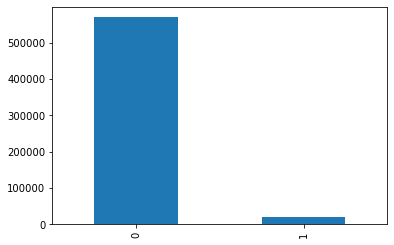

In [19]:
train_data['isFraud'].value_counts().plot.bar()


In [33]:
#label encoding the categorical value
for i in ['card4','card6','M1','M2','M3','M4','M5','M6','M7','M8','M9','DeviceType']:
    le =LabelEncoder()
    le.fit(list(train_data[i].astype(str).values) + list(test_data[i].astype(str).values))
    train_data[i] = le.transform(list(train_data[i].astype(str).values))
    test_data[i] = le.transform(list(test_data[i].astype(str).values))

In [27]:
train_data.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V332,V333,V334,V335,V336,V337,V338,V339,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,362.555488,150.0,1,142.0,...,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882,0,Windows
1,2987001,0,86401,29.0,W,2755,404.000000,150.0,2,102.0,...,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882,0,Windows
2,2987002,0,86469,59.0,W,4663,490.000000,150.0,3,166.0,...,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882,0,Windows
3,2987003,0,86499,50.0,W,18132,567.000000,150.0,2,117.0,...,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882,0,Windows
4,2987004,0,86506,50.0,H,4497,514.000000,150.0,2,102.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1,SAMSUNG SM-G892A Build/NRD90M


In [28]:
from sklearn.decomposition import PCA

train_pca = train_data.drop(['isFraud','TransactionAmt','TransactionDT'],axis=1)


In [31]:
# standardise the data
scaler = StandardScaler()
train_pca = scaler.fit_transform(train_pca)

ValueError: could not convert string to float: 'W'

In [21]:
# Define the X (features) and y (target) sets.
# Separate the target variable from the training set.
# Create a new dataframe that contains only the features that you will use to train the model.

target = train_data['isFraud']
features = train_data.drop(columns=['isFraud'])

In [22]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_valid, y_train, y_valid = train_test_split(train_pca, target, test_size=0.2, random_state=42)